## Chapter 2 - The DataFrame data structure

A tabular structure (rows and columns) for storing data in Python. It can be used for data manipulation and analysis.

### 2.1 How to create a Dataframe

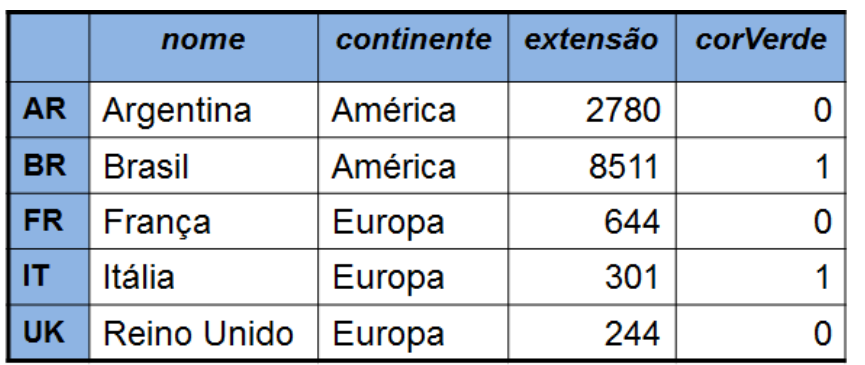

In [30]:
import pandas as pd

data = {'nome': ['Argentina', 'Brasil', 'França', 'Itália', 'Reino Unido'], 
        'continente': ['América', 'América', 'Europa', 'Europa', 'Europa'], 
        'extensao': [2780, 8511, 644, 301, 244 ],
        'corVerde': [0, 1, 0, 1, 0]}

siglas = ['AR', 'BR', 'FR', 'IT', 'UK']

paises = pd.DataFrame(data, index=siglas)

print(paises)

           nome continente  extensao  corVerde
AR    Argentina    América      2780         0
BR       Brasil    América      8511         1
FR       França     Europa       644         0
IT       Itália     Europa       301         1
UK  Reino Unido     Europa       244         0


Every DataFrame is an object of type 'pandas.core.frame.DataFrame' that has the following basic properties:


*shape*: Dataframe format. Its number of rows (shape[0]) and columns (shape[1]);\n   
*index*: list with the line labels;\n
*columns*: list with column labels;\n
*dtypes*: returns a Series with the 'dtypes' of each column;\n
*index.dtype*: *dtype* of the line labels.


### 2.2 Techniques for querying and modifying data

#### 2.2.1 Indexing

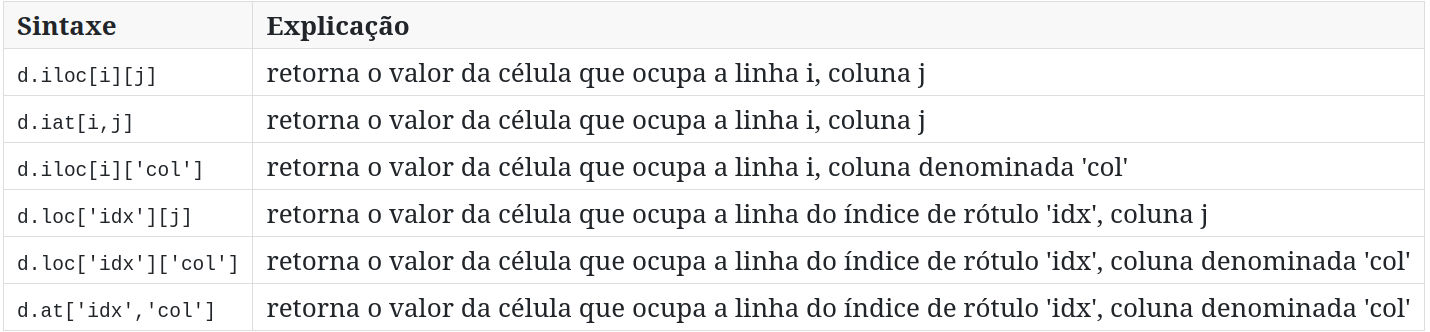

Using the countries dataset:

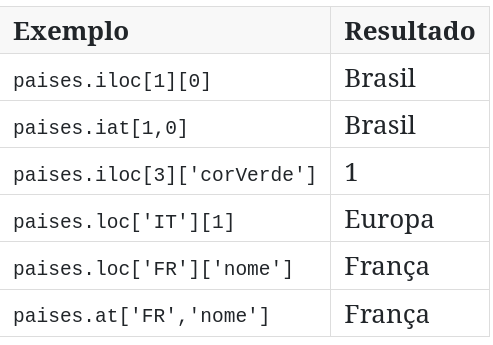

To perform the slicing:

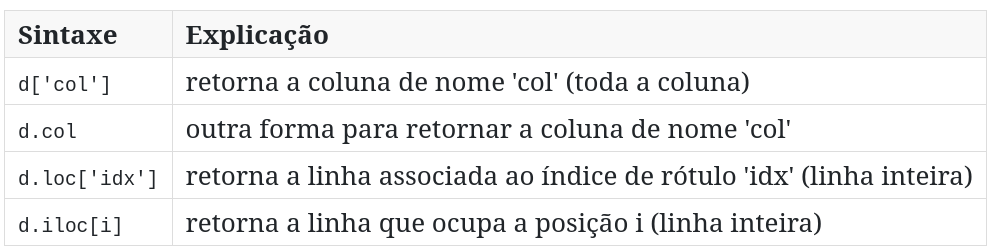

Usando o dataset de países:

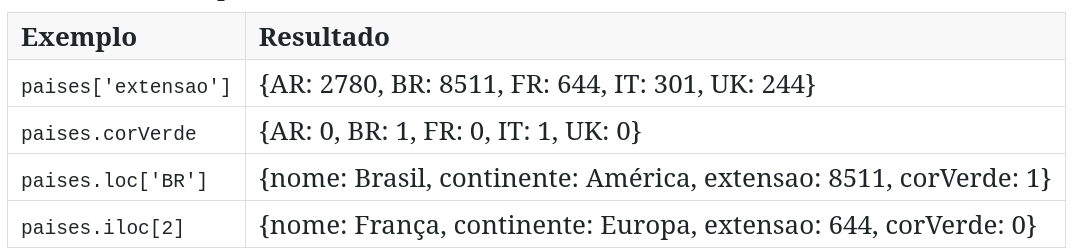

To slice portions of the DataFram that are different from an entire row or column, the desired row and column slices must be defined within square brackets [], using the colon operator (:) and separated by a comma (,). See below the result obtained through three different slicing operations on the *DataFrame* countries:

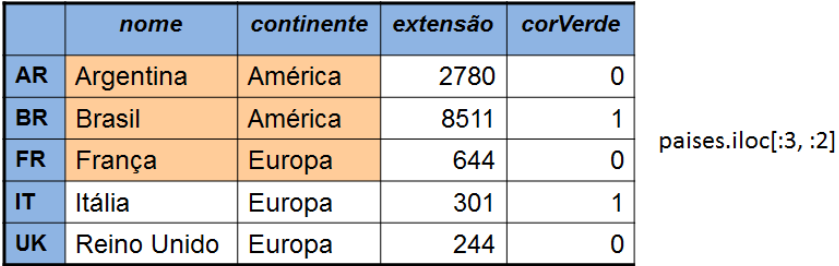


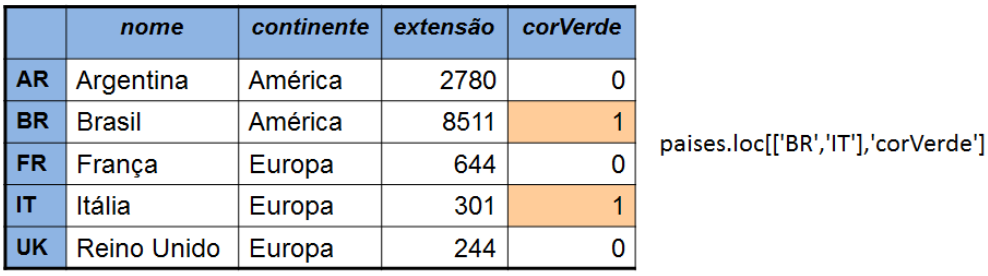

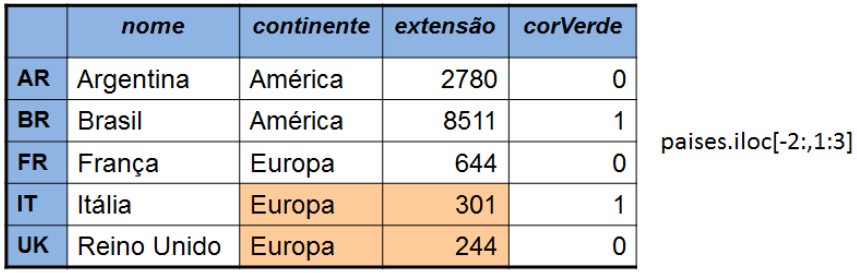

#### 2.2.2 Search

In [31]:
import pandas as pd

data = {'nome': ['Argentina', 'Brasil', 'França', 'Itália', 'Reino Unido'], 
        'continente': ['América', 'América', 'Europa', 'Europa', 'Europa'], 
        'extensao': [2780, 8511, 644, 301, 244 ],
        'corVerde': [0, 1, 0, 1, 0]}

siglas = ['AR', 'BR', 'FR', 'IT', 'UK']

paises = pd.DataFrame(data, index=siglas)

tem_br = 'BR' in paises.index
tem_US = 'US' in paises.index

print('Tem BR:', tem_br)
print('Tem US:', tem_US)

print('-----' * 10)

tem_corVerde = 'corVerde' in paises.columns
tem_corAzul = 'corAzul' in paises.columns

print('Tem corVerde:', tem_corVerde)
print('Tem corAzul:', tem_corAzul)

print('-----' * 10)

tem_brasil = paises['nome'].isin(['Brasil'])
print('Tem Brasil:\n', tem_brasil)



Tem BR: True
Tem US: False
--------------------------------------------------
Tem corVerde: True
Tem corAzul: False
--------------------------------------------------
Tem Brasil:
 AR    False
BR     True
FR    False
IT    False
UK    False
Name: nome, dtype: bool


#### 2.2.3 Modification

In [32]:
import pandas as pd

data = {'nome': ['Argentina', 'Brasil', 'França', 'Itália', 'Reino Unido'], 
        'continente': ['América', 'América', 'Europa', 'Europa', 'Europa'], 
        'extensao': [2780, 8511, 644, 301, 244 ],
        'corVerde': [0, 1, 0, 1, 0]}

siglas = ['AR', 'BR', 'FR', 'IT', 'UK']

paises = pd.DataFrame(data, index=siglas)

#insert japan
paises.loc['JP'] = {
    'nome': 'Japão', 
    'continente': 'Ásia', 
    'extensao': 378, 
    'corVerde': 0
}

# alter brasil extension
paises.loc['BR']['extensao'] = 8512

# drop argentina and uk
paises = paises.drop(['AR', 'UK'])

print(f'Update DataFrame:\n{paises}')



Update DataFrame:
      nome continente  extensao  corVerde
BR  Brasil    América      8511         1
FR  França     Europa       644         0
IT  Itália     Europa       301         1
JP   Japão       Ásia       378         0


/tmp/ipykernel_29518/746784197.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paises.loc['BR']['extensao'] = 8512


#### 2.2.4 Working with data

##### 2.2.4.1 CSV import

We can read CSV (comma-separated values) files and other types of files based on **delimiter characters** using the *read_csv()* method. See the example below:

In [33]:
import pandas as pd

paises = pd.read_csv('./data/paises.csv', index_col='sigla')
print(paises)

              nome continente  extensao  corVerde
sigla                                            
AR       Argentina    América      2780         0
BR          Brasil    América      8511         1
FR          França     Europa       644         0
IT          Itália     Europa       301         1
UK     Reino Unido     Europa       244         0


The file has a header, so we didn't need to define them. *read_csv* has several parameters that can help import structured files in many ways. We can ignore lines, change encoding patterns, name columns, allow a column to be transformed into a row index, etc.

In [ ]:
# definimos o cabeçalho e o seperador que o arquivo usa
notas = pd.read_csv("./data/notas.csv", sep =  ';' , names = ['matricula', 'nota1', 'nota2'])

print(notas)

  matricula  nota1  nota2
0  M0012017    9.8    9.5
1  M0022017    5.3    4.1
2  M0032017    2.5    8.0
3  M0042017    7.5    7.5


In [ ]:
#txt 
serie_gols = pd.read_csv('./data/gols.txt', sep=' ', index_col=0)

serie_gols = serie_gols.squeeze("columns")


serie_gols.index = pd.to_datetime(serie_gols.index, format='%d/%m/%Y')

print(serie_gols)

dia
2019-06-05    1
2019-06-09    0
2019-06-16    5
2019-06-19    2
2019-06-23    1
2019-06-27    3
2019-06-30    0
Name: gols, dtype: int64


In [39]:
#json
import json

with open('./data/notas.json') as f:
    j_notas = json.load(f)

notas = pd.DataFrame(j_notas, columns=['matricula', 'notas'])

print(notas)

  matricula       notas
0  M0012017  [9.8, 9.5]
1  M0022017  [5.3, 4.1]
2  M0032017  [2.5, 8.0]
3  M0042017  [7.5, 7.5]


In [ ]:
#save df

to_csv = paises.to_csv('./data/paises_salvo.csv')
to_excel = paises.to_excel('./data/paises_salvo.xlsx')